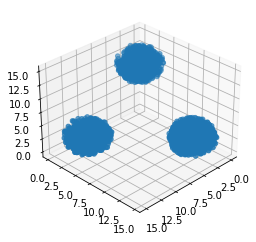

In [88]:
import random
import math
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

data = []
sphere = [[12,3,3,3], [3,12,3,3], [3,3,12,3]]

def deg_to_rad(d):
    return d*math.pi/180

def get_sphere(x, y, z, r, num):
    data = []
    for i in range(num):
        a = deg_to_rad(random.uniform(0, 360))
        b = deg_to_rad(90-random.uniform(0, 360))
        tmp_r = random.uniform(0,r**3)**(1/3)
        tmp_x = x + tmp_r*math.cos(a)
        tmp_y = y + tmp_r*math.sin(a)*math.cos(b)
        tmp_z = z + tmp_r*math.sin(a)*math.sin(b)
        data.append([tmp_x, tmp_y, tmp_z])
    return data

data = []
for x, y, z, r in sphere:
    data.extend(get_sphere(x, y, z, r, 1000))

data = np.array(data)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(data[:,0],data[:,1],data[:,2])
ax.view_init(30, 45)


plt.show()

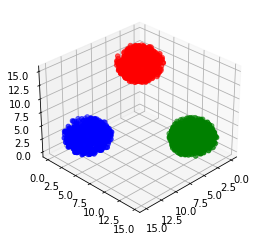

In [89]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3, random_state = 10).fit(data)
labels = kmeans.predict(data)

fig = plt.figure()
ax = fig.add_subplot(projection = '3d')


ax.scatter(data[labels == 0][:,0], data[labels == 0][:,1], data[labels == 0][:,2], color = 'red')
ax.scatter(data[labels == 1][:,0], data[labels == 1][:,1], data[labels == 1][:,2], color = 'blue')
ax.scatter(data[labels == 2][:,0], data[labels == 2][:,1], data[labels == 2][:,2], color = 'green')

ax.view_init(30,45)
plt.show()

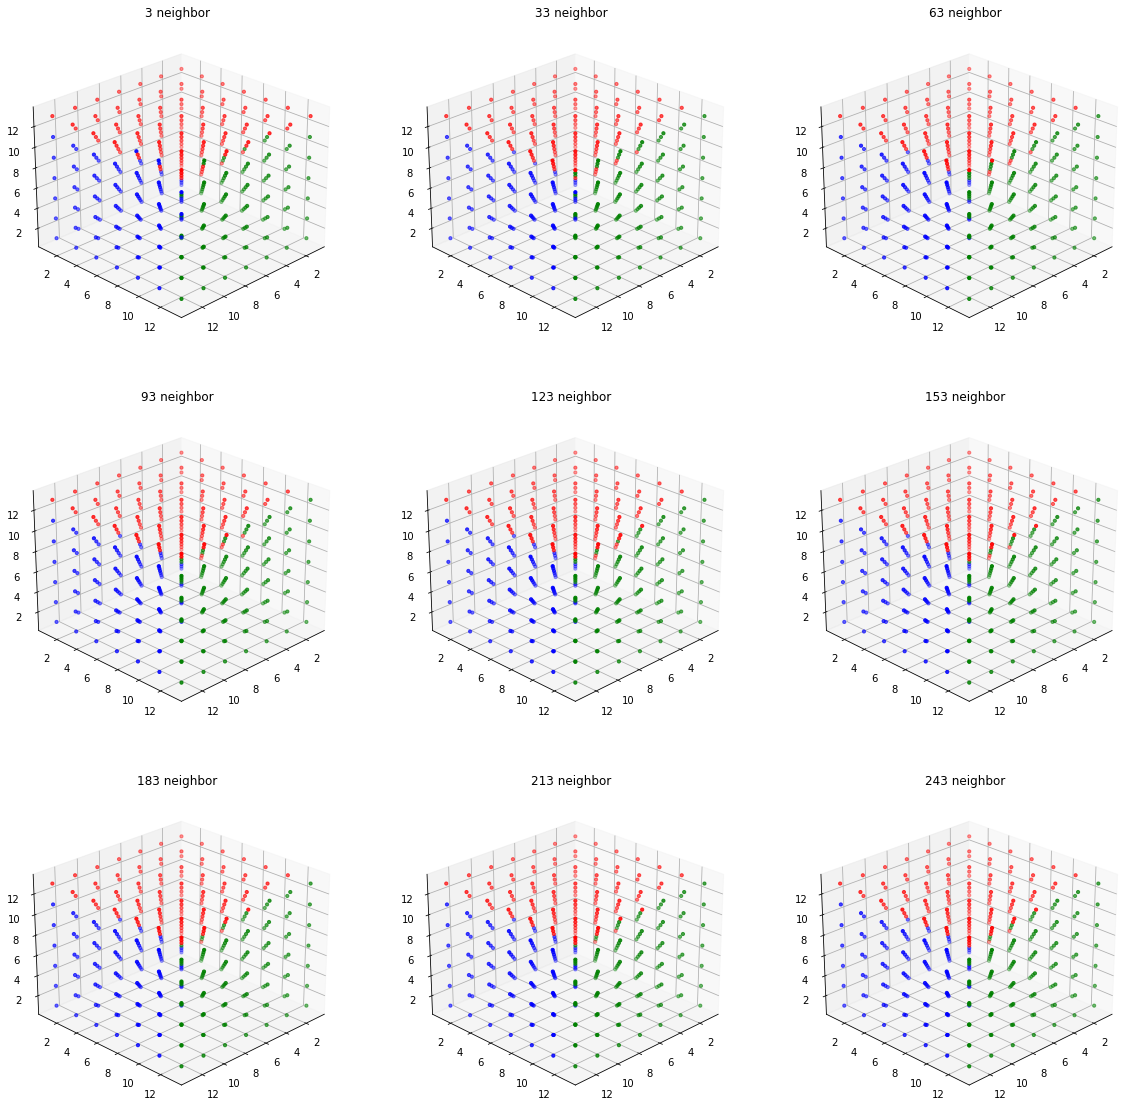

In [93]:
from sklearn.neighbors import KNeighborsClassifier


test_dataset = []
for i in range(1,15,2):
    for j in range(1,15,2):
        for k in range(1,15,2):
            test_dataset.append([i, j, k])
test_dataset = np.array(test_dataset)


fig = plt.figure(figsize=(20,20))
neighbor = 3
k=1
for i in range(3):
    for j in range(3):
        neigh = KNeighborsClassifier(n_neighbors = neighbor)
        neigh.fit(data, labels)
        pred = neigh.predict(test_dataset)
        
        ax = fig.add_subplot(3, 3, k, projection = '3d')

        ax.scatter(test_dataset[pred == 0][:,0], test_dataset[pred == 0][:,1], test_dataset[pred == 0][:,2], color = 'red', s = 10)
        ax.scatter(test_dataset[pred == 1][:,0], test_dataset[pred == 1][:,1], test_dataset[pred == 1][:,2], color = 'blue', s = 10)
        ax.scatter(test_dataset[pred == 2][:,0], test_dataset[pred == 2][:,1], test_dataset[pred == 2][:,2], color = 'green', s = 10)
        ax.title.set_text(f'%d neighbor'%neighbor)
        ax.view_init(25,45)
        k+=1
        neighbor += 30
        
    
plt.show()

[0 1 2]


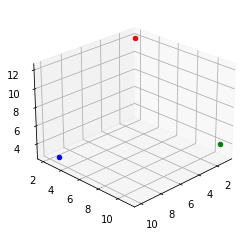

In [95]:
test = [[1,2,12], [10,3,3], [1,11,4]]
test = np.array(test)
neigh = KNeighborsClassifier(n_neighbors = 15)
neigh.fit(data, labels)
pred = neigh.predict(test)
print(pred)

fig = plt.figure()
ax = fig.add_subplot(projection = '3d')
ax.scatter(test[pred==0][:,0], test[pred==0][:,1], test[pred==0][:,2], color = 'red')
ax.scatter(test[pred==1][:,0], test[pred==1][:,1], test[pred==1][:,2], color = 'blue')
ax.scatter(test[pred==2][:,0], test[pred==2][:,1], test[pred==2][:,2], color = 'green')
ax.view_init(25,45)
plt.show()